In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/데이콘/exercise_motion_classification/data/')

In [3]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

# train

In [ ]:
train.isnull().sum() # 결측치 없음

id       0
time     0
acc_x    0
acc_y    0
acc_z    0
gy_x     0
gy_y     0
gy_z     0
dtype: int64

In [ ]:
train.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [ ]:
train.iloc[:,2:].describe()

,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
count,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06
mean,-4.489683e-01,-1.617913e-01,5.571471e-02,-1.307982e+00,-4.337745e-01,8.864100e-01
std,7.173082e-01,5.872018e-01,4.724824e-01,6.083228e+01,7.329832e+01,7.063345e+01
min,-8.838427e+00,-9.299714e+00,-8.316425e+00,-1.811127e+03,-1.594256e+03,-1.346143e+03
25%,-9.625643e-01,-5.163020e-01,-2.123550e-01,-2.048984e+01,-1.865320e+01,-1.546226e+01
50%,-6.560482e-01,-2.033985e-01,3.031258e-02,-1.421819e+00,-2.642753e-01,-1.798643e-01
75%,-1.701162e-04,1.406493e-01,3.581982e-01,1.572245e+01,1.676328e+01,1.641878e+01
max,8.426799e+00,8.484622e+00,6.432668e+00,1.870256e+03,2.111657e+03,1.255849e+03


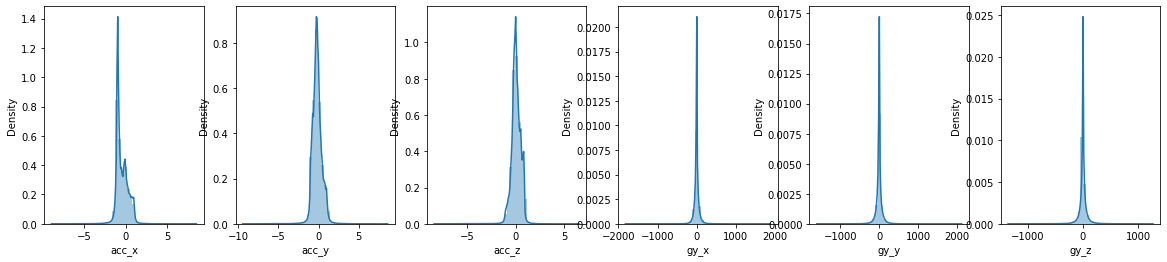

In [ ]:
cols = train.iloc[:,2:].columns
plt.figure(figsize=(20,4))
for i in range(1,len(train.iloc[:,2:].columns)+1):
  plt.subplot(1,6,i)
  sns.distplot(train[cols[i-1]])

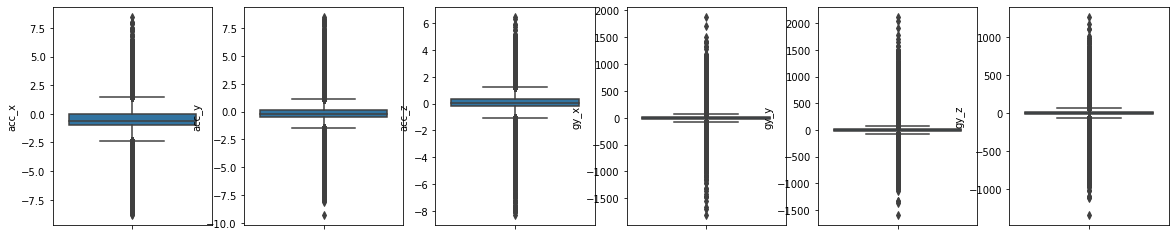

In [ ]:
cols = train.iloc[:,2:].columns
plt.figure(figsize=(20,4))
for i in range(1,len(train.iloc[:,2:].columns)+1):
  plt.subplot(1,6,i)
  sns.boxplot(y=train[cols[i-1]])

- acc는 -10과 10 사이안에 값이 대부분 분포하지만 gy의 경우 -2000에서 2000까지 값이 분포하므로 range가 acc보다 큼
- 값 0에 값이 많이 분포되어있음을 확인할 수 있음 

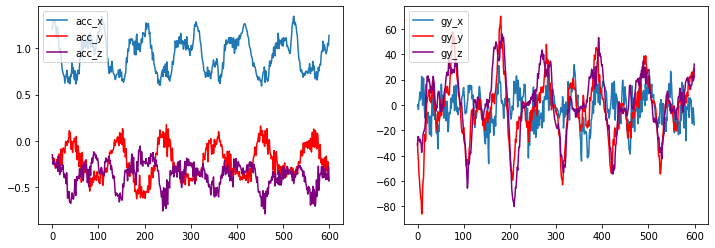

In [ ]:
train_id0 = train[train['id']==0]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_id0['acc_x'],label='acc_x')
plt.plot(train_id0['acc_y'],c='red',label='acc_y')
plt.plot(train_id0['acc_z'],c='purple',label='acc_z')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(train_id0['gy_x'],label='gy_x')
plt.plot(train_id0['gy_y'],c='red',label='gy_y')
plt.plot(train_id0['gy_z'],c='purple',label='gy_z')
plt.legend(loc='upper left')

In [ ]:
train_labels[train_labels['id']==0]['label_desc'] # label = 37 -> shoulder press

0    Shoulder Press (dumbbell)
Name: label_desc, dtype: object

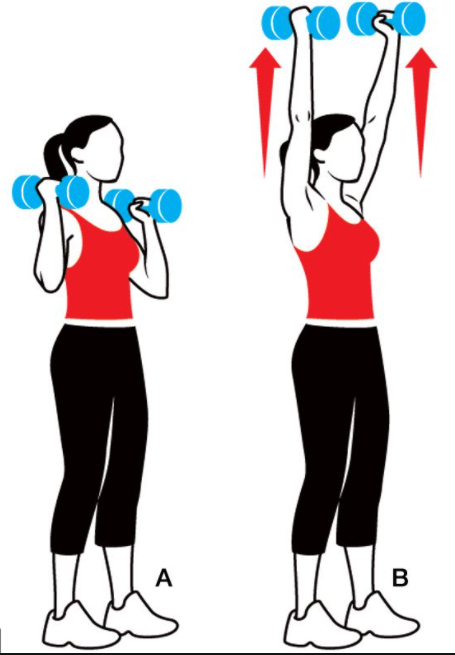{: width="300" height="300"){: .center}

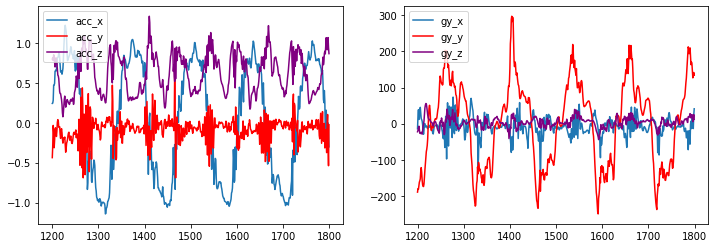

In [ ]:
train_id2 = train[train['id']==2]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_id2['acc_x'],label='acc_x')
plt.plot(train_id2['acc_y'],c='red',label='acc_y')
plt.plot(train_id2['acc_z'],c='purple',label='acc_z')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(train_id2['gy_x'],label='gy_x')
plt.plot(train_id2['gy_y'],c='red',label='gy_y')
plt.plot(train_id2['gy_z'],c='purple',label='gy_z')
plt.legend(loc='upper left')

In [ ]:
train_labels[train_labels['id']==2] # label = 3 -> bicep curl

,id,label,label_desc
2,2,3,Biceps Curl (band)


In [ ]:
train_labels[train_labels['id']==1]['label_desc'] # label = 37 -> shoulder press

1    Non-Exercise
Name: label_desc, dtype: object

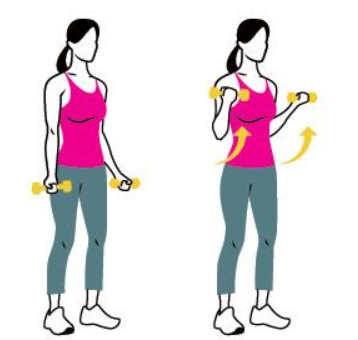

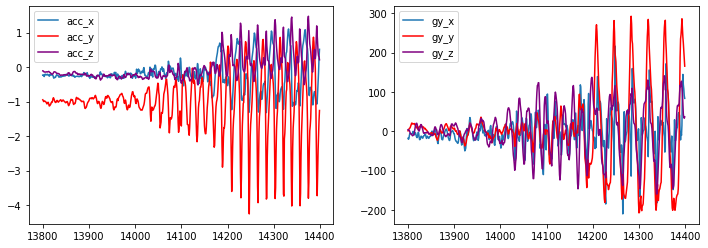

In [ ]:
train_id23 = train[train['id']==23]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_id23['acc_x'],label='acc_x')
plt.plot(train_id23['acc_y'],c='red',label='acc_y')
plt.plot(train_id23['acc_z'],c='purple',label='acc_z')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(train_id23['gy_x'],label='gy_x')
plt.plot(train_id23['gy_y'],c='red',label='gy_y')
plt.plot(train_id23['gy_z'],c='purple',label='gy_z')
plt.legend(loc='upper left')

In [ ]:
train_labels[train_labels['id']==23]

,id,label,label_desc
23,23,34,Running (treadmill)


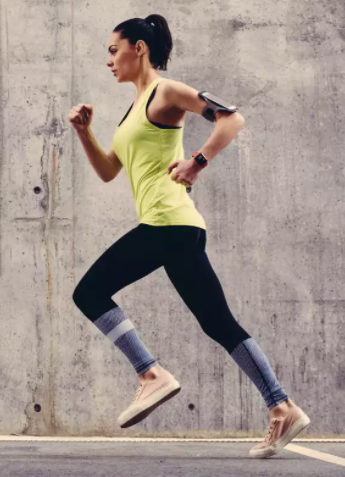

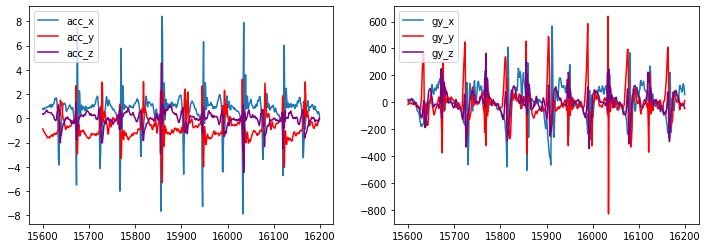

In [ ]:
train_id26 = train[train['id']==26]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_id26['acc_x'],label='acc_x')
plt.plot(train_id26['acc_y'],c='red',label='acc_y')
plt.plot(train_id26['acc_z'],c='purple',label='acc_z')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(train_id26['gy_x'],label='gy_x')
plt.plot(train_id26['gy_y'],c='red',label='gy_y')
plt.plot(train_id26['gy_z'],c='purple',label='gy_z')
plt.legend(loc='upper left')

In [ ]:
train_labels[train_labels['id']==26]

,id,label,label_desc
26,26,59,Wall Ball


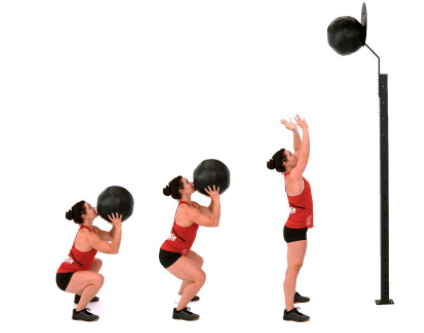

In [ ]:
train_labels['label'].value_counts() # 61개의 라벨중 wall ball이 1518개로 50%이상을 차지함

26    1518
8       97
28      55
60      48
18      47
      ... 
53      13
52      12
13      12
12      12
0       12
Name: label, Length: 61, dtype: int64

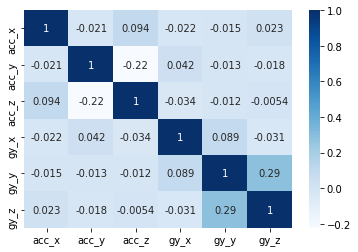

In [ ]:
sns.heatmap(train.iloc[:,2:].corr(),cmap='Blues',annot=True)

- acc와 gy 모두 y와 z간의 상관관계가 각각 음과 양으로 0.2이상이 나오면서 관련성을 확인

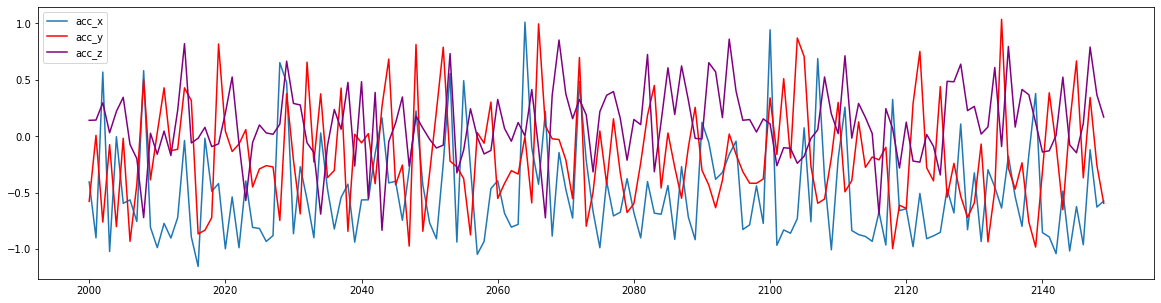

In [ ]:
mean_acc = train.groupby(['id'])[['acc_x','acc_y','acc_z']].mean()
mean_acc['label'] = train_labels['label']

part_mean_acc = mean_acc[2000:2150]

plt.figure(figsize=(20,5))
plt.plot(part_mean_acc['acc_x'],label='acc_x')
plt.plot(part_mean_acc['acc_y'],c='red',label='acc_y')
plt.plot(part_mean_acc['acc_z'],c='purple',label='acc_z')
plt.legend(loc='upper left')

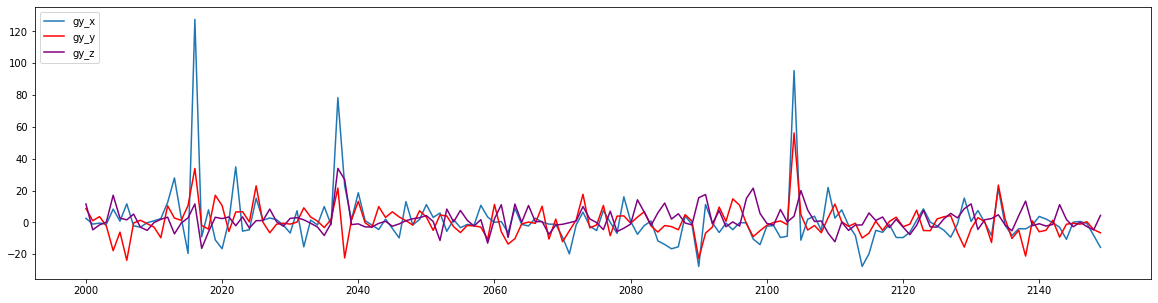

In [ ]:
mean_gy = train.groupby(['id'])[['gy_x','gy_y','gy_z']].mean()
mean_gy['label'] = train_labels['label']

part_mean_gy = mean_gy[2000:2150]

plt.figure(figsize=(20,5))
plt.plot(part_mean_gy['gy_x'],label='gy_x')
plt.plot(part_mean_gy['gy_y'],c='red',label='gy_y')
plt.plot(part_mean_gy['gy_z'],c='purple',label='gy_z')
plt.legend(loc='upper left')

- 궁금증 1 
  - 왜 gy_x 중 유독 값이 큰 게 있는데 어떤 운동 동작일까?

In [ ]:
part_mean_gy[part_mean_gy['gy_x']>60] # 유독 값이 높은 gx_x의 운동분류는 줄넘기(jump rope)나 동적인 스트레칭(dynamic strecth)이라는 사실을 발겸함

,gy_x,gy_y,gy_z,label
id,,,,
2016,127.597984,33.907032,11.633052,18
2037,78.340600,21.588670,33.949119,15
2104,95.372827,56.232225,3.887263,18


In [ ]:
mask = (train_labels['id'] == 2016) | (train_labels['id'] == 2037) | (train_labels['id'] == 2104)
train_labels[mask]

,id,label,label_desc
2016,2016,18,Jump Rope
2037,2037,15,Dynamic Stretch (at your own pace)
2104,2104,18,Jump Rope


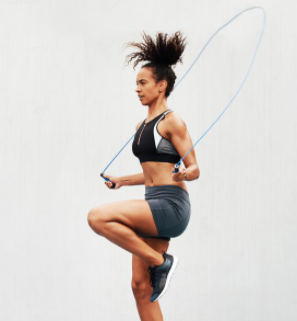

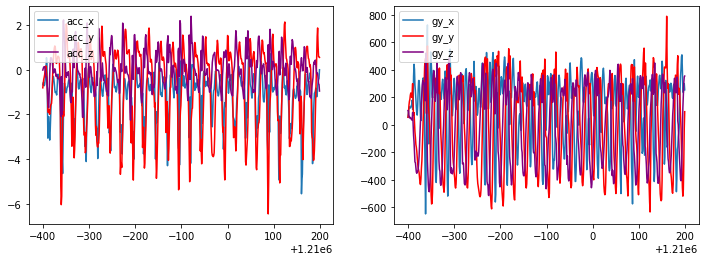

In [ ]:
train_id2016 = train[train['id']==2016] # 줄넘기의 log를 살펴봄

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_id2016['acc_x'],label='acc_x')
plt.plot(train_id2016['acc_y'],c='red',label='acc_y')
plt.plot(train_id2016['acc_z'],c='purple',label='acc_z')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(train_id2016['gy_x'],label='gy_x')
plt.plot(train_id2016['gy_y'],c='red',label='gy_y')
plt.plot(train_id2016['gy_z'],c='purple',label='gy_z')
plt.legend(loc='upper left')

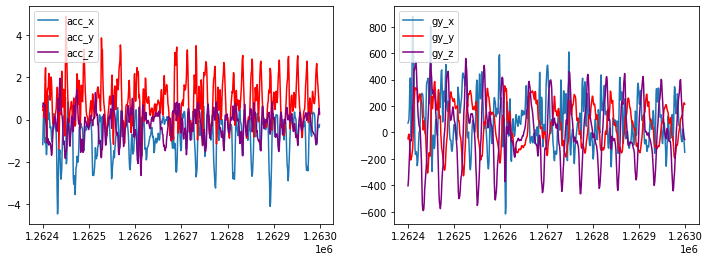

In [ ]:
train_id2104 = train[train['id']==2104]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_id2104['acc_x'],label='acc_x')
plt.plot(train_id2104['acc_y'],c='red',label='acc_y')
plt.plot(train_id2104['acc_z'],c='purple',label='acc_z')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(train_id2104['gy_x'],label='gy_x')
plt.plot(train_id2104['gy_y'],c='red',label='gy_y')
plt.plot(train_id2104['gy_z'],c='purple',label='gy_z')
plt.legend(loc='upper left')

- 줄넘기의 경우 다른 운동보다 forearm(앞팔)의 움직임이 빠르고 격하게 움직이기 때문에 값이 더 크고 주기가 짧게 나타난 경우가 많았다.

### datamanim이 코드공유로 제공해주신 '헬스 도메인으로 본 데이터 EDA ( FFT)'을 운동 분류 기준을 사용했습니다. 

감사합니다. 

# 시계열분석 

분석 참고 : https://ehfgk78.github.io/2018/01/21/DataScience07TimeSeriesData01/

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
train_time = pd.read_csv('train_features.csv',index_col='time')
train_time.head()

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
time,,,,,,,
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


<Figure size 1440x288 with 0 Axes>

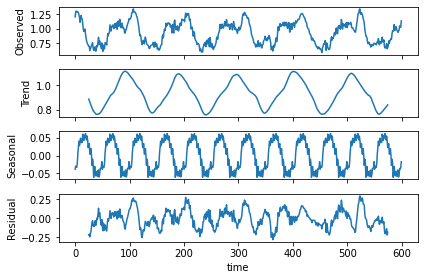

In [27]:
decomposition = seasonal_decompose(train_time['acc_x'][:600],freq=50)
plt.rcParams['agg.path.chunksize'] = 1000 # OverflowError: Exceeded cell block limit 해결방법
fig = plt.figure(figsize=(20,4))
fig = decomposition.plot()

- 시계열 데이터이며 아이디별 12초간의 데이터가 주기적인 값으로 나타남을 알 수 있다. 
- id = 0 인 데이터만 추출했지만 약 3000명의 운동 데이터의 추세, 계절성은 어떤지 볼 필요가 있다. 
- ARIMA모델을 만들어 미래 예측값을 만들어낼 수 있다. (여기선 데이터증강에 해당됨)

<Figure size 1440x288 with 0 Axes>

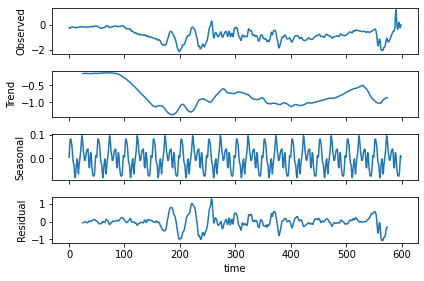

In [18]:
decomposition = seasonal_decompose(train_time['acc_x'][600:1200],freq=50)
plt.rcParams['agg.path.chunksize'] = 1000 # OverflowError: Exceeded cell block limit 해결방법
fig = plt.figure(figsize=(20,4))
fig = decomposition.plot()

- non-exercise의 경우 데이터에 규칙성을 찾기가 힘들어 데이터 증강시 error를 줄이기 위해 생략을 생각해봐야한다.

<Figure size 1440x288 with 0 Axes>

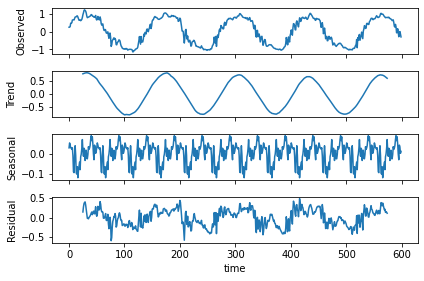

In [31]:
decomposition = seasonal_decompose(train_time['acc_x'][1200:1800],freq=50)
plt.rcParams['agg.path.chunksize'] = 1000 # OverflowError: Exceeded cell block limit 해결방법
fig = plt.figure(figsize=(20,4))
fig = decomposition.plot()

In [32]:
trend_id2 = decomposition.trend
seasonal_id2 = decomposition.seasonal
residual_id2 = decomposition.resid

- trend, seasonal, residual값들을 앞 뒤 결측치만 회귀나 예측을 통해 채우고 변수로 활용해볼 수 있을 것이다. 